<a href="https://colab.research.google.com/github/dimasdytya/kuliah/blob/main/TA_KELOMPOK_2_PDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Kelompok 2**


1. 195150400111027	ALIF RIZAL MAULANA
2. 195150407111020	ALVAN ALIF YUDITAMA
3. 205150401111021	GERALDA FERRYDINA ALIF
4. 205150401111024	NUR IZZAH MAULA RAMADHANI
5. 205150401111048	DIMAS ADITIYA
6. 205150401111051	MOHAMMAD YUSRON JAUHARI





# **Business Understanding**

Dalam industri kesehatan dan medis, keakuratan prediksi sebuah penyakit sangatlah penting dan memerlukan keputusan yang efektif dalam mengambil suatu analisa dan keakuratan prediksi suatu penyakit yang diderita pasien. Salah satu penyakit yang membutuhkan keakuratan prediksi adalah penyakit jantung.


Penyakit kardiovaskular atau penyakit jantung umumnya mengacu pada kondisi yang melibatkan penyempitan atau pemblokiran pembuluh darah yang bisa menyebabkan serangan jantung, nyeri dada, atau stroke (WHO, 2017). Penyakit ini merupakan penyebab kematian nomor 1 di dunia, tercatat sekitar 17,9 juta orang meninggal per tahun akibat penyakit ini. Penyakit ini juga diestimasikan menyumbang 32% dari kematian di seluruh dunia (WHO, 2021). Orang dengan penyakit kardiovaskular atau yang berada pada risiko kardiovaskular tinggi (karena adanya satu atau lebih faktor risiko, seperti hipertensi, diabetes, hiperlipidemia, atau penyakit yang sudah ada) memerlukan deteksi dan manajemen dini di mana model pembelajaran mesin dapat sangat membantu untuk memprediksi penyakit tersebut. Oleh karena itu, pada tugas ini, kami akan mencoba untuk memprediksi kemungkinan seseorang memiliki penyakit jantung atau tidak.





# **Analytic Approach**

Untuk melakukan proses klasifikasi dapat dilakukan menggunakan random forest classifier dari library sklearn.ensemble. Dalam random forest classifier mengeluarkan prediksi kelas dan kelas dengan suara terbanyak menjadi prediksi model kami (lihat gambar di bawah).

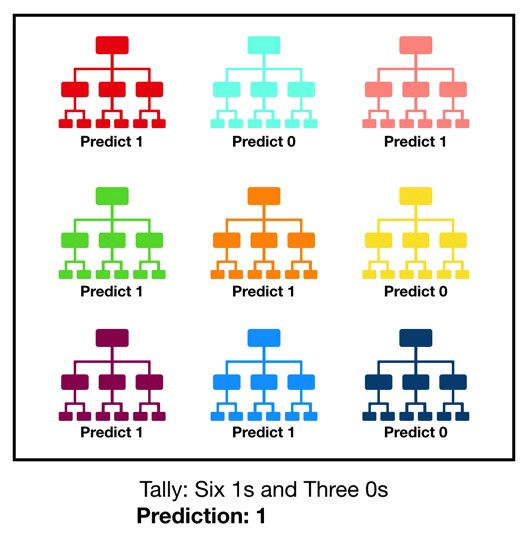

Untuk dapat menjalankannya terdapat prasayarat agar dapat berfungsi dengan baik yaitu :

1. Perlu ada beberapa sinyal aktual dalam fitur kami sehingga model yang dibuat menggunakan fitur tersebut bekerja lebih baik daripada menebak secara acak.
2. Prediksi (dan oleh karena itu kesalahan) yang dibuat oleh masing-masing pohon harus memiliki korelasi yang rendah satu sama lain.

# **Data Requirements**

Untuk dapat melakukan prediksi terhadap gagal jantung atau tidak, dibutuhkan data medis yang dapat menjadi indikasi gejala tersebut. Data tersebut bisa berupa usia, jenis kelamin, kolestrol, tekanan darah, detak jantung, dan lain lain

# **Data Collection**

Dataset yang digunakan didapatkan dari kaggle.com. Dimana dataset tersebut adalah dataset yang digunakan untuk prediksi gagal jantung. Dan dataset tersebut bertipe klasifikasi. Berikut adalah detail attribut dari dataset yang kami dapatkan :

1. Age: age of the patient [years]
2. Sex: sex of the patient [M: Male, F: Female]
3. ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
4. RestingBP: resting blood pressure [mm Hg]
5. Cholesterol: serum cholesterol [mm/dl]
6. FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
7. RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
8. MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
9. ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
10. Oldpeak: oldpeak = ST [Numeric value measured in depression]
11. ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
12. HeartDisease: output class [1: heart disease, 0: Normal]














# **Data Understanding**

In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/arima2515/project_web/main/heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


Mengimport libary pandas dan numpy dan memberikan inisial, kemudian meload dataset ke dalam bentuk dataframe dan disimpan dalam variabel df

In [ ]:
print('We have {:n} observation and {:n} column in our dataset'.format(df.shape[0],df.shape[1]))

We have 918 observation and 12 column in our dataset


Menggunakan shape untuk mendapatkan jumlah kolom dan jumlah baris dari dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


meggunakan info() untuk mengetahui informasi dari semua kolom di dalam dataset. Yaitu informasi untuk berapa data yang tidak null dalam kolom tersebut dan tipe datanya

In [ ]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


menggunakan describe() untuk mengetahui detail informasi seperti rata rata, min, max, dari kolom yang berjenis int. Bisa juga menampilkan kolom data yang berjenis object dengan menambahkan parameter include='all'

In [ ]:
categorical = df.select_dtypes(object).columns
numerical = df.drop(["HeartDisease"],axis=1).select_dtypes(int).columns
print("Those are categorical/discrete column in our dataset : " , df[categorical].columns)
print("Those are numerical/continous column in our dataset : ", df[numerical].columns)

Those are categorical/discrete column in our dataset :  Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')
Those are numerical/continous column in our dataset :  Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR'], dtype='object')


disini membuat 2 variabel yang memuat nama kolom dari dataset. Yang pertama kolom dengan data bertipe object dan kedua kolom dengan data bertipe int

In [ ]:
print("Unique values in categorical columns :")
print("="*40)
print(df[categorical].nunique())
print("="*40)

Unique values in categorical columns :
Sex               2
ChestPainType     4
RestingECG        3
ExerciseAngina    2
ST_Slope          3
dtype: int64


digunakan fungsi nunique() untuk mengetahui keunikan data dari kolom dengan tipe data object. Dan hasilnya adalah nama kolom dan ada berapa data unique dalam kolom tersebut. Diatas dapat dilihat data tidak terlalu bervariasi, karena kolom yang paling unique adalah 4. Hal ini baik untuk membuat model karena data tidak terlalu bervariasi

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f864d0a3dd0>,
      dtype=object)

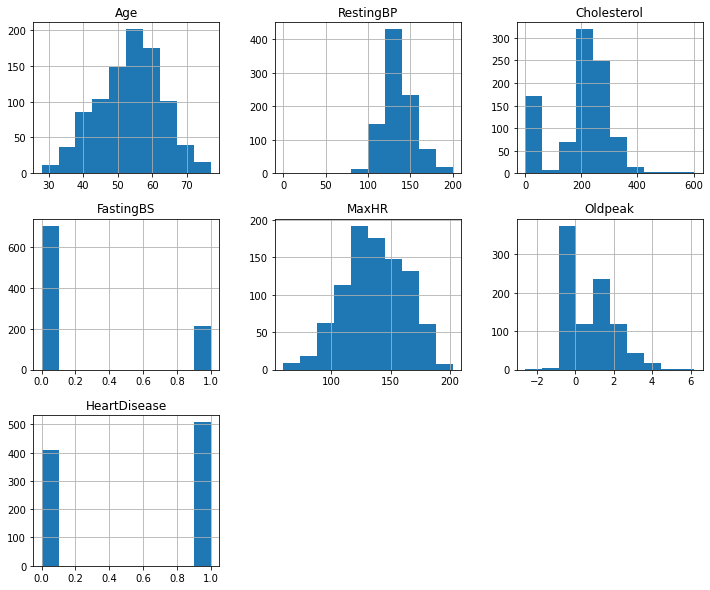

In [ ]:
df.hist(figsize=(12,10))

Digunakan fungsi hist(), untuk membuat histogram dari kolom yang bertipe integer, menggunakan parameter figsize untuk menentukan panjang kali lebarnya. Digunakan untuk melihat persebaran data dari kolom tersebut. Dan hasilnya bisa dilihat diatas terdapat sedikit keanehan pada kolom kolestrol, dimana beberapa data memiliki tingkat kolestrol 0.

In [ ]:
data = df.select_dtypes(include=np.number)
data = data.drop(["HeartDisease"], axis=1)

disini dibuat variabel data dan yang dipilih adalah kolom berjenis number kemudian mengecualikan kolom hearthdisease yang merupakan kelas target klasifikasi

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.dpi'] = 150

disini dilakukan import dari library matplotlib.pyplot dengan inisial plt dan seabron dengan inisial sns. Kemudian menentukan tingkat dpi/ketajaman dari grafik yang akan divisualisasikan dari library plt yaitu 150. Dan terdapat metplotlib iniline agar grafis langsung dicetak dibawah blok kode dan hasilnya disimpan ke dalam notebook

Text(0.5, 1.0, 'Boxplot visualization that help to figure out outlier data')

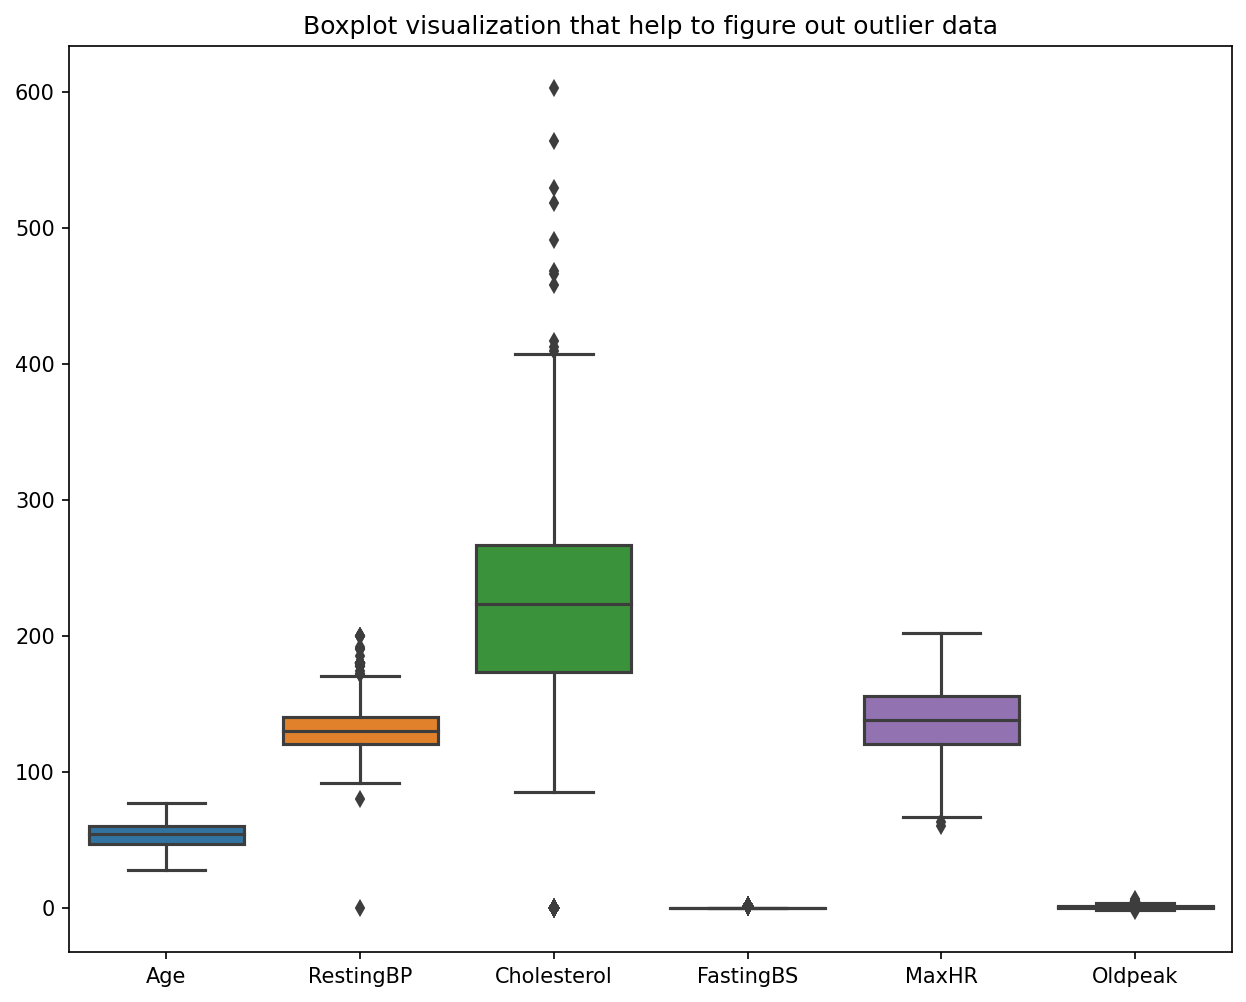

In [ ]:
plt.figure(figsize=(10,8))
sns.boxplot(data=data)
plt.title("Boxplot visualization that help to figure out outlier data")

Disini kita menggunakan visualisasi boxplot dengan menggunakan variabel data yang tadi kita buat, yaitu variabel dari kolom bertipe integer. Tujuannya adalah untuk melihat apakah ada outlier dalam dataset kami. Dan hasilnay dapat dilihat terdapat beberapa outlier dalam dataset kolestrol.

In [ ]:
df_cholestrol = df[df["Cholesterol"] >= 500].index
df = df.drop(df_cholestrol,axis=0)
df.Cholesterol.value_counts()

0      172
254     11
223     10
220     10
204      9
      ... 
358      1
355      1
354      1
353      1
491      1
Name: Cholesterol, Length: 218, dtype: int64

Disini kita lakukan penanganan dari data outlier tersebut, yaitu dimana kolestrol yang lebih dari sama dengan 500 akan kami hapus baris datanya dalam datset. Kemudian menggunakan fungsi value_counts() untuk melihat persebaran data kolesterol, dan hasilnya kolesterol maksimal adalah 491 dan terdapat 172 data dengan tingkat kolesterol 0

In [ ]:
df.Cholesterol.replace(to_replace=0,value=int(df.Cholesterol.mean()),inplace=True)

Disini dilakukan penanganan untuk dataset kolesterol yang memiliki nilai 0 yaitu dengan mereplace data 0 dengan nilai rata rata dari semua kolesterol dalam dataset.

In [ ]:
df["Age"] = df.Age.astype(int)
bins = [0,10,20,30,40,50,60,70,80,90]
labels = ["0-10", "11-20", "21-30", "31-40", "41-50", "51-60", "61-70", "71-80", "81-90"]

df["Age_Interval"] = pd.cut(df.Age, labels=labels, bins = bins, right=False)

Pada bagian ini dilakukan pemotongan dari kolom usia menjadi beberapa interval tertentu, yaitu dengan jarak 10 tahun mulai dari 0 tahun hingga 90 tahun. Kemudian memasukkan hasil pemotongan tersebut ke dalam kolom baru bernama Age_Interval

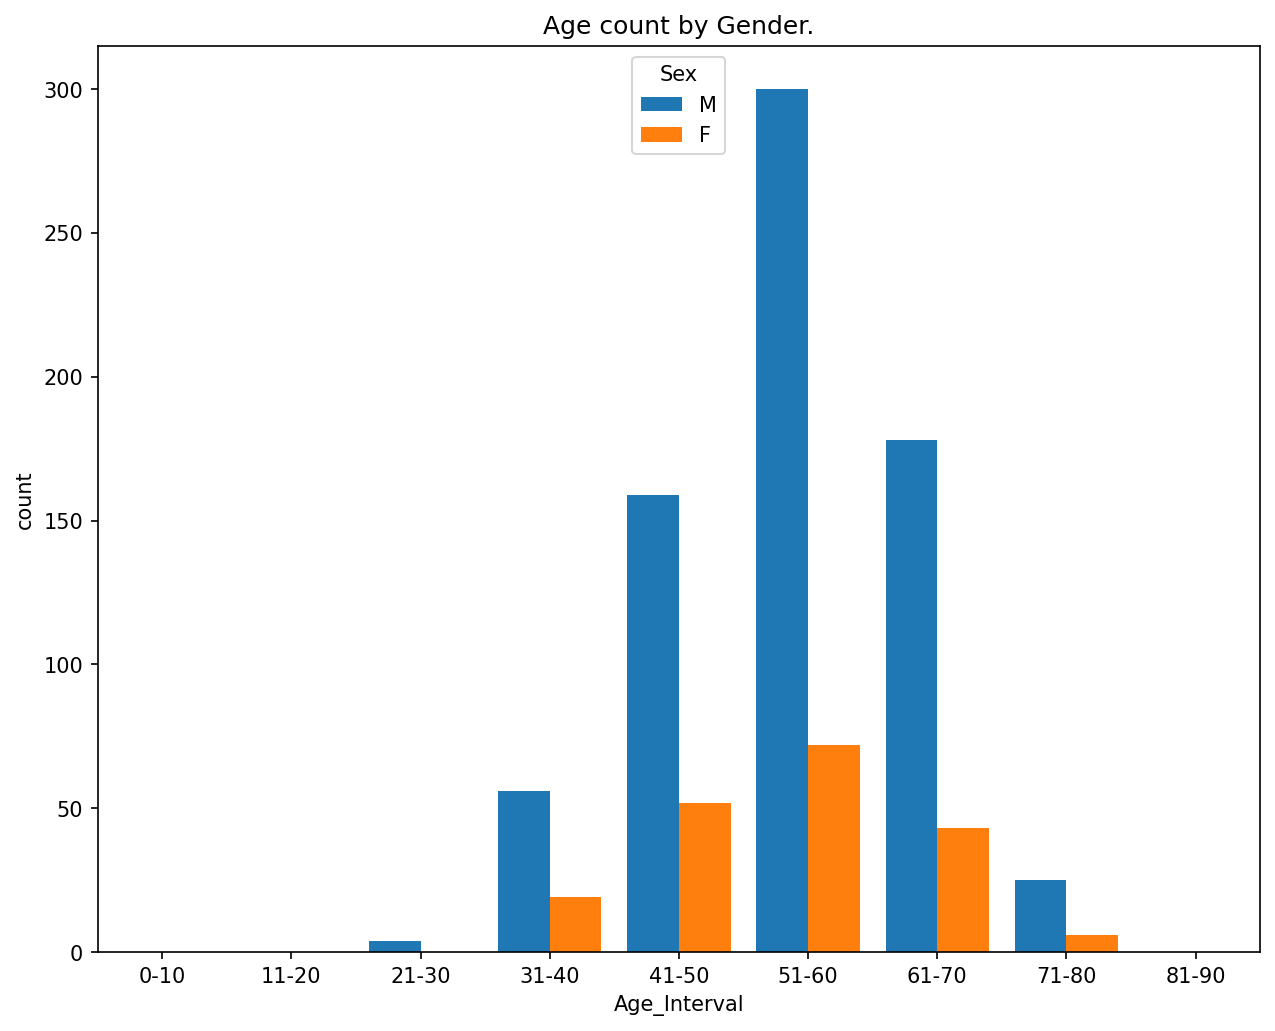

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(x="Age_Interval", hue="Sex", data=df ,saturation=1.2)

plt.title("Age count by Gender.")
plt.show()

Disini dilakukan visualisasi menggunakan countplot untuk mengetahui jumlah dari data age_interval, dan datanya dibedakan berdasarkan jenis kelamin. Hasilnya bisa dilihat bahwa dalam dataset kebanyakan berusia mulai dari 40 tahun hingga 70 tahun, dan kebanyakan jenis kelaminnya adalah laki-laki.

In [ ]:
df.HeartDisease.replace({0 : "Normal", 1 :"Heart Disease"}, inplace=True)

Kemudian disini dilakukan replace nilai dari kolom heartdisesase yaitu menggubak indikator dari angka menjadi huruf agar lebih mudah dipahami saat digunakan untuk visualisasi

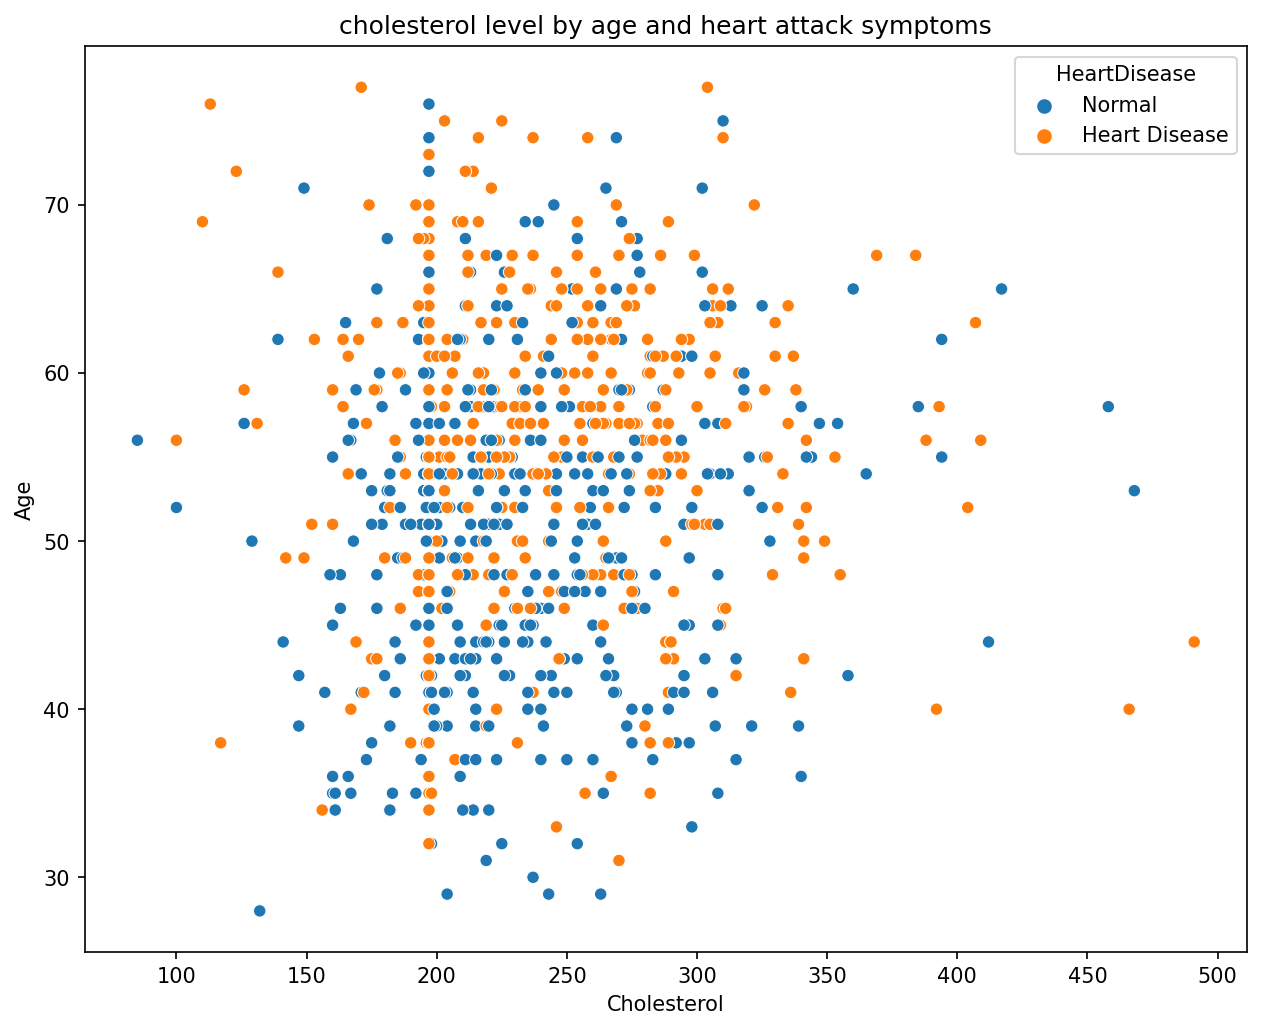

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(x="Cholesterol", y="Age",hue="HeartDisease", data=df)

plt.title("cholesterol level by age and heart attack symptoms")
plt.show()

Diatas dilakukan visualisasi data menggunakan scatterplot yang bertujuan untuk mengetahui persebaran data, disini variabel yang digunakan adalah kolesterol dan usia, kemudian datanya dibedakan antara yang mengalami gejala jantung dengan yang tidak. Bisa dilihat hasilnya bahwa memiliki kolesterol yang cenderung rendah atau tinggi tidak menjamin aman dari kemungkinan penyakit jantung. Dan untuk usia dimana cenderung mengalami penyakit jantung yaitu diatas 50 tahun

In [ ]:
for col_name in df.select_dtypes(object):
  print("="*50)
  print(df[col_name].value_counts())

M    722
F    192
Name: Sex, dtype: int64
ASY    494
NAP    201
ATA    173
TA      46
Name: ChestPainType, dtype: int64
Normal    549
LVH       187
ST        178
Name: RestingECG, dtype: int64
N    544
Y    370
Name: ExerciseAngina, dtype: int64
Flat    456
Up      395
Down     63
Name: ST_Slope, dtype: int64
Heart Disease    505
Normal           409
Name: HeartDisease, dtype: int64


pada code diatas digunakan pengulangan untuk semua kolom bertipe object dalam dataset. Kemudian menggunakan fungsi value_counts() yang bertujuan untuk melihat jumlah data dari setiap nilai dari kolom object, misal diatas dapat dilihat bahwa terdapat 722 laki-laki dan 192 perempuan

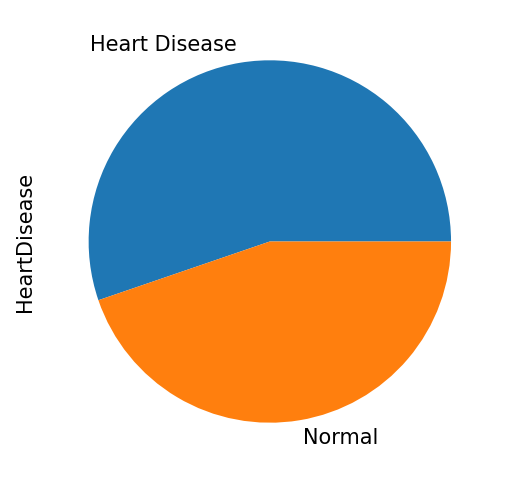

In [ ]:
df.HeartDisease.value_counts().plot(kind="pie")
plt.show()

Disini digunakan visualisasi berjenis pie, dengan data yaitu kolom heartdisease yang bertujuan untuk melihat keseimbangan kolom yang akan diprediksi. Dan hasilnya cukup tidak imbang dimana data heartdisease lebih banyak dibanding data normal

# **Data Preparation**

In [ ]:
print(df.isnull().sum())

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
Age_Interval      0
dtype: int64


Disini dilakukan pengecekan terhadap data yang null menggunakan fungsi isnull(), kemudian dijumlah dengan fungsi sum(). Dapat dilihat tidak ada data yang null

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
categorical = df.select_dtypes(object).columns
for column in categorical :
  df[column] = le.fit_transform(df[column])
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Age_Interval
0,40,1,1,140,289,0,1,172,0,0.0,2,1,41-50
1,49,0,2,160,180,0,1,156,0,1.0,1,0,41-50
2,37,1,1,130,283,0,2,98,0,0.0,2,1,31-40
3,48,0,0,138,214,0,1,108,1,1.5,1,0,41-50
4,54,1,2,150,195,0,1,122,0,0.0,2,1,51-60


Pada bagian ini dilakukan labeling pada kolom yang bertipe categorical/object agar bisa dilakukan modeling. Menggunakan kelas LabelEncoder dari libary sklearn.preprocessing. kemudian mendefinisikan ulang variabel categorical, karena tadi sempat mengubah kolom heartdisease menjadi categorical. Kemudian menggunakan perulangan untuk melakukan labeling menggunakan fit_transform agar data langsung direturn ke variabel df sesuai kolomnya

In [ ]:
df.HeartDisease.value_counts()

0    505
1    409
Name: HeartDisease, dtype: int64

Menghitung perbedaan jumlah kolom target prediksi

In [ ]:
from sklearn.utils import resample

one = df[df["HeartDisease"] == 1]
zero = df[df["HeartDisease"] == 0]

df_upsampled = resample(one, replace=True, n_samples=505)

df = pd.concat([df_upsampled,zero])

from sklearn.utils import shuffle

df = shuffle(df)

Disini dilakukan proses upsampling, untuk meningkatkan jumlah kolom prediksi yang julmlahnya kurang. Menggunakana kelas resample dari library sklearn.utils. Pertama membuat dua variabel atau sesuai jumlah kelas prediksi, dan mengisinya dengan masing masing data dari prediksi yang ada. Kemudian menggunakan resample memberikan parameter n_samples sesuai jumlah yang ingin dicapai, data yang ingin di resample dan replace = True. Kemudian hasilnya digabung menggnakan fungsi dari kelas pandas yaitu concat(). Dan terakhir dilakukan shuffles untuk mengacak baris dalam dataset

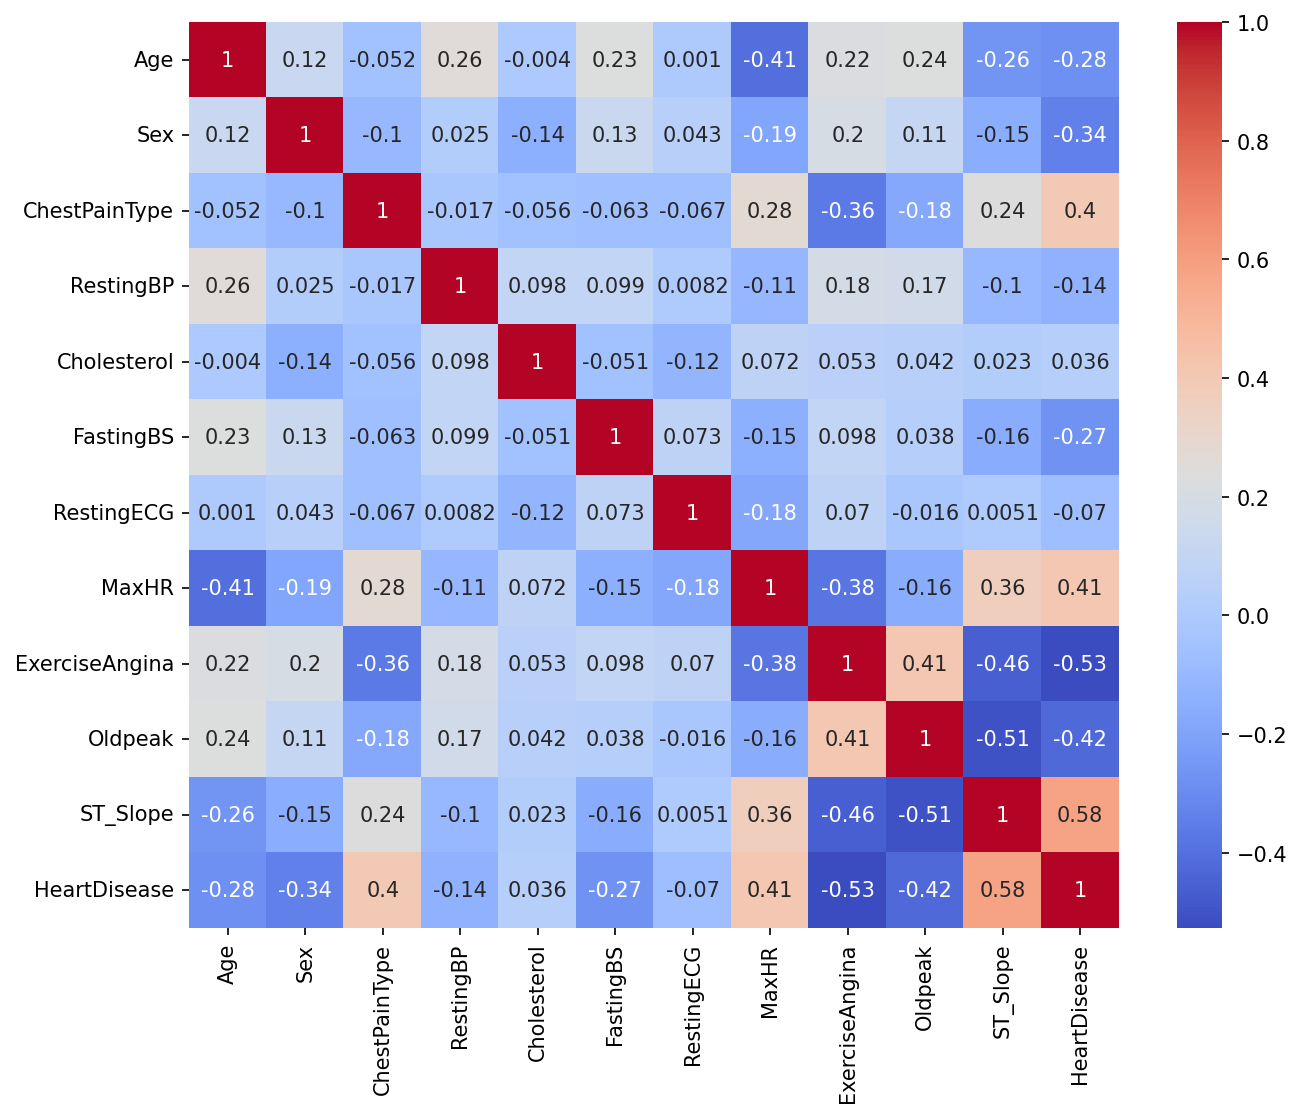

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap="coolwarm",annot=True)

Disini dilakukan visualisasi kembali untuk melihat korelasi antar variabel. Menggunakan salah satu jenis visualisasi yaitu heatmap menggunakan parameter df.Corr(), dimana fungsi corr() mengembalikan nilai korelasi semua variabel. Kemudian memberikan paramete cmap untuk menentukan warna yang ingin digunakan, dan annot = True untuk menyesuaikan posisi angka yang divisualisasikan. Hasilnya adalah berupa tingkat korelasi, dimana semakin tinggi semakin berkorelasi dan semakin rendah semakin tidak berkorelasi. Dan ada juga korelasi positif yaitu berbanding lurus dan korelasi negatif berbanding terbalik. Contoh dari hasilnya adalah bahwa variabel yang paling berpengaruh untuk menentukan seseorang memiliki penyakit jantung atau tidak adalah ST_Slope dengan tingkat korelasi positif sebesar 0.53

# **Data Modeling**

In [ ]:
X = df.drop(["HeartDisease","Age_Interval" ], axis=1)
y = df["HeartDisease"]

Pada bagian ini dilakukan pemilihan fitur dan kolom yang akan diprediksi. Untuk fitur akan dimasukkan ke variabel X dan yang digunakan adalah semua kolom kecuali kolom heartdisease karena kolom itu yang akan kami prediksi, dan age_interval adalah kolom buatan untuk visualisasi yang tidak termasuk fitur. Kemudian untuk kolom yang akan menjadi kelas prediksi akan dimasukkan ke variabel y

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
feature = X.columns
X[feature] = sc.fit_transform(X[feature])

Kemudian pada bagian ini dilakukan normalisasi data agar tidak ada data yang terlalu memengaruhi hasil prediksi karena skalanya yang besar. Contoh kolesterol dibandingkan dengan oldpeak, kolesterol memiliki skala ratusan dan oldpeak hanya satuan, sehingga hal ini akan mengganggu hasil prediksi. Disini digunakan kelas standardscaler dari library sklearn.preprocessing, untuk melakukan normalisasi terhadap semua fitur pada variabel X

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

Kemudian disini dilakukan pembagian dataset, menjadi data tes dan data train. Dimana data train akan digunakan untuk melatih model dan data tes digunakan untuk mengecek akurasi model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

Mengimport model yaitu randomforestclassifier dan gridsearch untuk melakukan tuning hyperparamter dari model agar mendapatkan akurasi terbaik

In [ ]:
rf = RandomForestClassifier()

param_rf = {'n_estimators':[1,2,5,10,50,100,200, 350, 500,1000], 'min_samples_leaf': [2,10,30,40,50,60,70], 'criterion' :['gini','entropy'],'class_weight' :['balanced', 'balanced_subsample']}
grid_rf = GridSearchCV(rf, param_grid=param_rf, cv = 5)

Pada bagian ini membuat model dengan parameter default, kemudian membuat sebuah variabel param_rf yang berisi dictionary parameter dari model RandomForestClassifier. Setelah itu membuat objek GridSearchCV dengan parameter model dan hyperparameter model serta cross validation

In [ ]:
grid_rf.fit(X_train,y_train)
print("Best params for rf : " , grid_rf.best_params_)

Best params for rf :  {'class_weight': 'balanced_subsample', 'criterion': 'gini', 'min_samples_leaf': 2, 'n_estimators': 350}


Kemudian dilakukan pencarian parameter terbaik dengan hyperparameter data train. Dan mencetak hasil pencarian tersebut

In [ ]:
rf = RandomForestClassifier(min_samples_leaf=2,n_estimators=350,random_state=42,criterion = 'gini',class_weight='balanced_subsample')

Setelah itu dilakukan pembuatan model randomforest kembali dengan hyperparameter terbaik dari hasil gridsearchCV

In [ ]:
#fit the model
rf.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced_subsample', min_samples_leaf=2,
                       n_estimators=350, random_state=42)

Setelah itu dilakukan fitting model dengan data train

# **Model Evaluation**

In [ ]:
from sklearn.metrics import accuracy_score

#test model
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)*100

#evaluate the accuracy model
print('{:s} : {:f}'.format("Random Forest",accuracy))

Random Forest : 91.089109


Kemudian disini mengimport method accruacy score dari library sklearn.metrics. Untuk mendapatkan tingkat akurasi model setelah melakukan perbandingan antara y predict hasil dari predict X test, dan membandingkan y predict dengan y test. Hailsnya didapatkan akurasi model sebesar 91 persen

In [ ]:
from sklearn.metrics import classification_report

y_pred_rf = rf.predict(X_test)
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.95      0.87      0.91       100
           1       0.88      0.95      0.92       102

    accuracy                           0.91       202
   macro avg       0.91      0.91      0.91       202
weighted avg       0.91      0.91      0.91       202



Kemudian disini mengimport method classification report dari library skelarn.metrics. Method tersebut digunakan untuk melihat sebaik apa prediksi model pada kelas klasifikasi 0 dan kelas klasifikasi 1. Dapat dilihat diatas akurasi prediksi kelas 0 adalah 88 persen, dan kuarsi prediksi kelas 1 adalah 88 persen. Kemudian rata-rata akurasi model adalah 95 persen.

Text(0.5, 32.08333333333333, 'Predicted label')

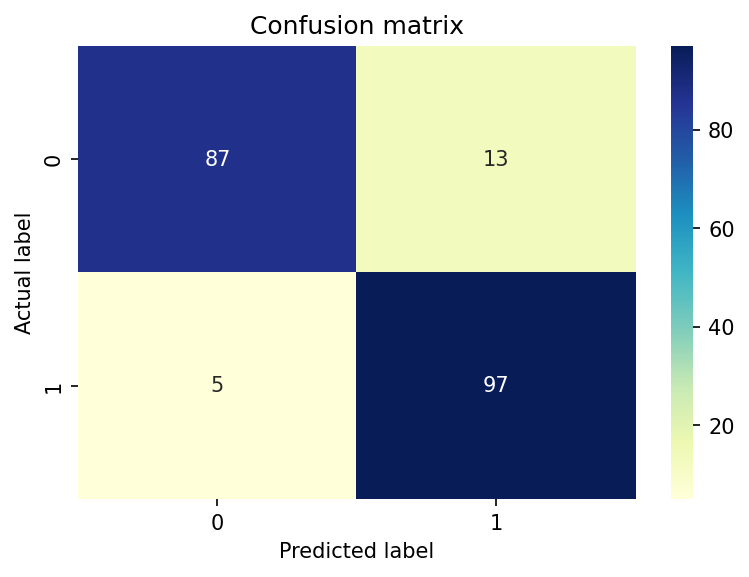

In [ ]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred_rf)
p = sns.heatmap(pd.DataFrame(cnf_matrix),annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Terakhir adalah menggunakan method confusion_matrix dari kelas metric. Confusion matrix ini digunakan untuk mengetahui hasil prediksi model pada y predict dengan membandingkannya pada y test. Jadi setelah mendapatkan hasilnya berupa list 2 dimensi. Kemudian hasil tersebut divisualisasikan menggunakan kelas seabron dengan graph berjenis heatmap. Haisilnya bisa dilihat diatas mesin melakukan kesalahan prediksi pada data test yaitu dimana kelas yang seharusnya 0 diprediksi 1 sebanyak 13 data, dan kelas yang seharusnya 1 diprediksi 0 sebanyak 5 data. Dan mesin berhasil memprediksi kelas data prediksi 1 dengan benar sebanyak 97 data, dan kelas data prediksi 0 sebanyak 87 data